      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]
[[130.  98.]
 [140.  98.]
 [ 90. 100.]
 ...
 [ 85.  98.]
 [120.  98.]
 [120. 101.]]


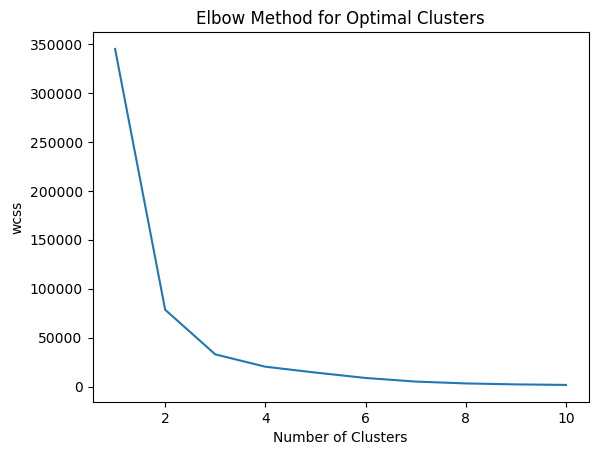

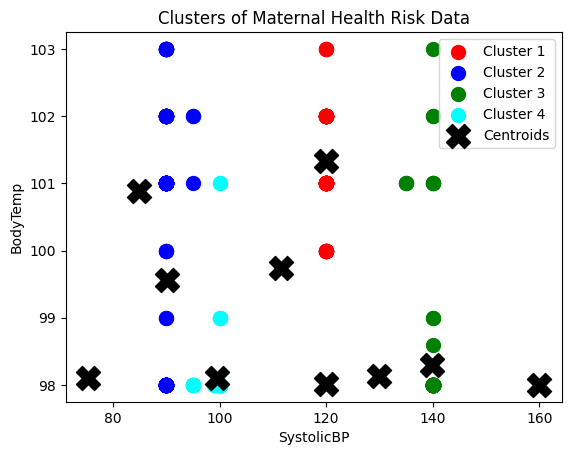

In [3]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Loading the dataset
csv_file=pd.read_csv("Maternal Health Risk Data Set.csv")
print(csv_file)
X=csv_file.iloc[:,[1,4]].values
print(X)

wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


# Applying K-Means clustering with the optimal number of clusters (k=4)
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Clusters of Maternal Health Risk Data')
plt.xlabel('SystolicBP')
plt.ylabel('BodyTemp')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

data=pd.read_csv("Maternal Health Risk Data Set.csv")
#print(data)

X=data.iloc[:,[1,2]].values
y=data.iloc[:,-1].values
print(X)


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)


scale1=StandardScaler()
X_train=scale1.fit_transform(X_train)
X_test=scale1.fit_transform(X_test)

print(X_train)


cl1=LinearSVC(max_iter=100,tol=0.001,loss='hinge')
cl1.fit(X_train, y_train)

y_predict=cl1.predict(X_test)
print(y_predict)


cm=confusion_matrix(y_test, y_predict)
print(cm)



accuracy = accuracy_score(y_test, y_predict)
print(accuracy)


scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
print(X_train_scaled)

<ipython-input-1-eb4a93e649f2>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[[130  80]
 [140  90]
 [ 90  70]
 ...
 [ 85  60]
 [120  90]
 [120  65]]
[[ 0.37091735  0.99304038]
 [ 0.37091735  0.26494769]
 [-0.17547866 -0.463145  ]
 ...
 [ 0.37091735  0.26494769]
 [-0.72187468 -0.463145  ]
 [ 1.46370939  1.72113307]]


/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['high risk' 'high risk' 'low risk' 'low risk' 'low risk' 'high risk'
 'high risk' 'high risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'high risk' 'low risk' 'low risk' 'high risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'low risk' 'mid risk' 'high risk'
 'high risk' 'low risk' 'high risk' 'high risk' 'low risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'high risk' 'mid risk' 'low risk'
 'high risk' 'low risk' 'high risk' 'high risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'low risk' 'high risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'low risk' 'high risk' 'low risk'
 'low risk' 'mid risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'high risk' 'high risk' 'low risk' 'low risk' 'low risk'
 'high risk' 'low risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'high risk' 'low risk' 'high risk' 'low risk' 'high risk' 'low risk'
 'high risk' 'low risk' 'low risk' 'low risk' 'high risk' 'low risk'
 'low risk' 'high risk' 'low risk

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("Maternal Health Risk Data Set.csv")
print(data)

X=data.iloc[:,[2,3]].values
y=data.iloc[:,-1].values
print(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.6, random_state=0)

from sklearn.preprocessing import StandardScaler
scale1=StandardScaler()
X_train=scale1.fit_transform(X_train)
X_test=scale1.fit_transform(X_test)

print(X_train)

from sklearn.naive_bayes import GaussianNB
cl1=GaussianNB()
cl1.fit(X_train, y_train)

y_predict=cl1.predict(X_test)
print(y_predict)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
print(cm)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
print(X_train_scaled)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]
[[80. 15.]
 [90. 13.]
 [70.  8.]
 ...
 [60. 19.]
 [90. 18.]
 [65.  6.]]
[[-0.95247587 -0.19796899]
